# An Introduction to Dimensionality Reduction

### The curse of dimensionality

I know in the previous module-Supervised Machine Learning- we often said that the more data you have the better for your model performance. In reality, this is not always the case, hence the 'Curse of Dimensionality'. This is a scenario where the model effectiveness, accurracy deteriorates with the increase of dimensions- the more features you have.

*So how is it that a model can perform poorly the more features it has, aren't we feeding it with more information?*

Well, not quite...

In high-dimensional spaces, the feature space is extremely large, which makes the data points become sparse. Think of it this way, if you have 100 data points, if you fit them along a 1D line, they will take up more space along the line, now imagine fitting those same data points in a 52-D feature space- they will occupy a very small area of the feature space- which means most of the high-dimensional space is empty!


### Impact of the curse
1. Since the data points are so sparse in the high-dimensional space, it would mean your model needs to learn very complex relationships (across all these dimensions), so there is a high risk of learning from noise and overfitting the data.
2. High-dimensional data is also very computationally expensive to model.
3. It is very hard to visualize high-dimensional data, which makes EDA and understanding the structure of high-dimensional data tricky!



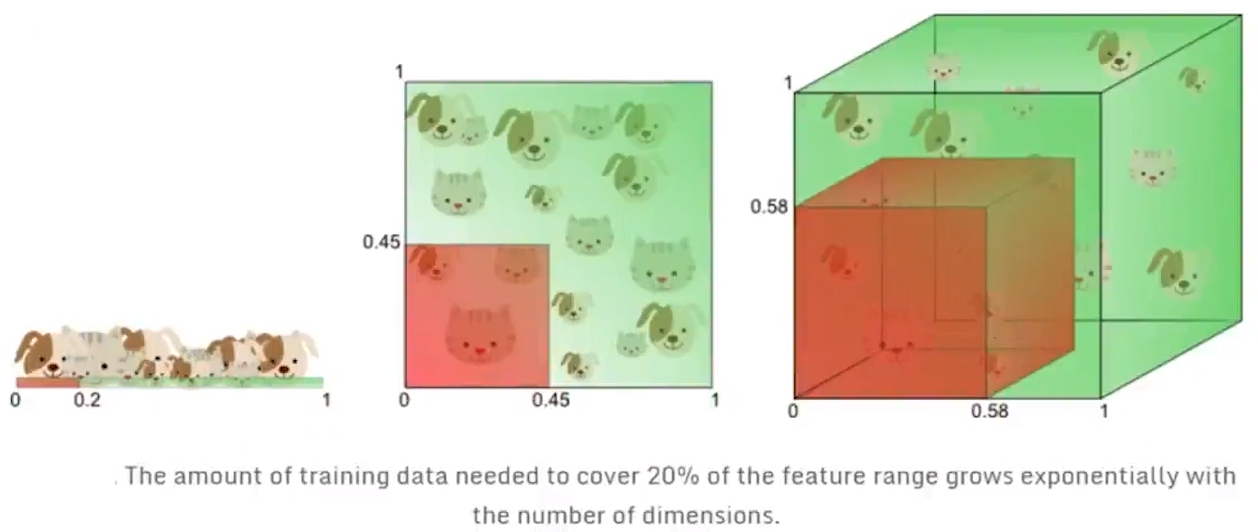

## Dimensionality Reduction Techniques


#### 1. Principal Component Analysis (PCA)

#### 2. Manifold Learning

Manifold learning is an approach to non-linear dimensionality reduction. Manifold learning that the true complexity of high-dimensional data is actually in a lower dimensional space. This is to say that,the underlying structure of high-dimensional data is actually in lower dimensions-despite what the dimensionality suggests. 

This lower dimensional structure is called a manifold. A manifold is locally simple and globally complex.The whole point of manifold learning is to learn the structure of this lower dimensional manifold. A good way to build intuition for this is to use the Swiss Roll dataset.

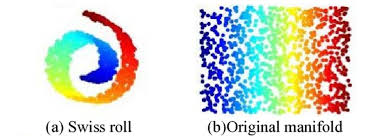

##### 2.1 T-distributed Stochastic Neighbour Embedding (t-SNE)

##### 2.2. Uniform Manifold Approximation and Projection (UMAP)

In very simple terms, UMAP works by first constructing a high-dimensional graph, which represents the relationships between the data points and across various clusters. It then randomly initializes a low-dimensional graph and optimizes this graph to match the structure of the high-dimensional one.

It is the same intuition as t-SNE, with just a few clever tricks here and there to make it faster and better at preserving both local and global relationships. The math behind UMAP is quite advanced, but luckily the intuition is pretty straightforward (and is the focus for this lesson).
If you want to dive deeper into the math, UMAP provides [great documentation](https://umap-learn.readthedocs.io/en/latest/how_umap_works.html)

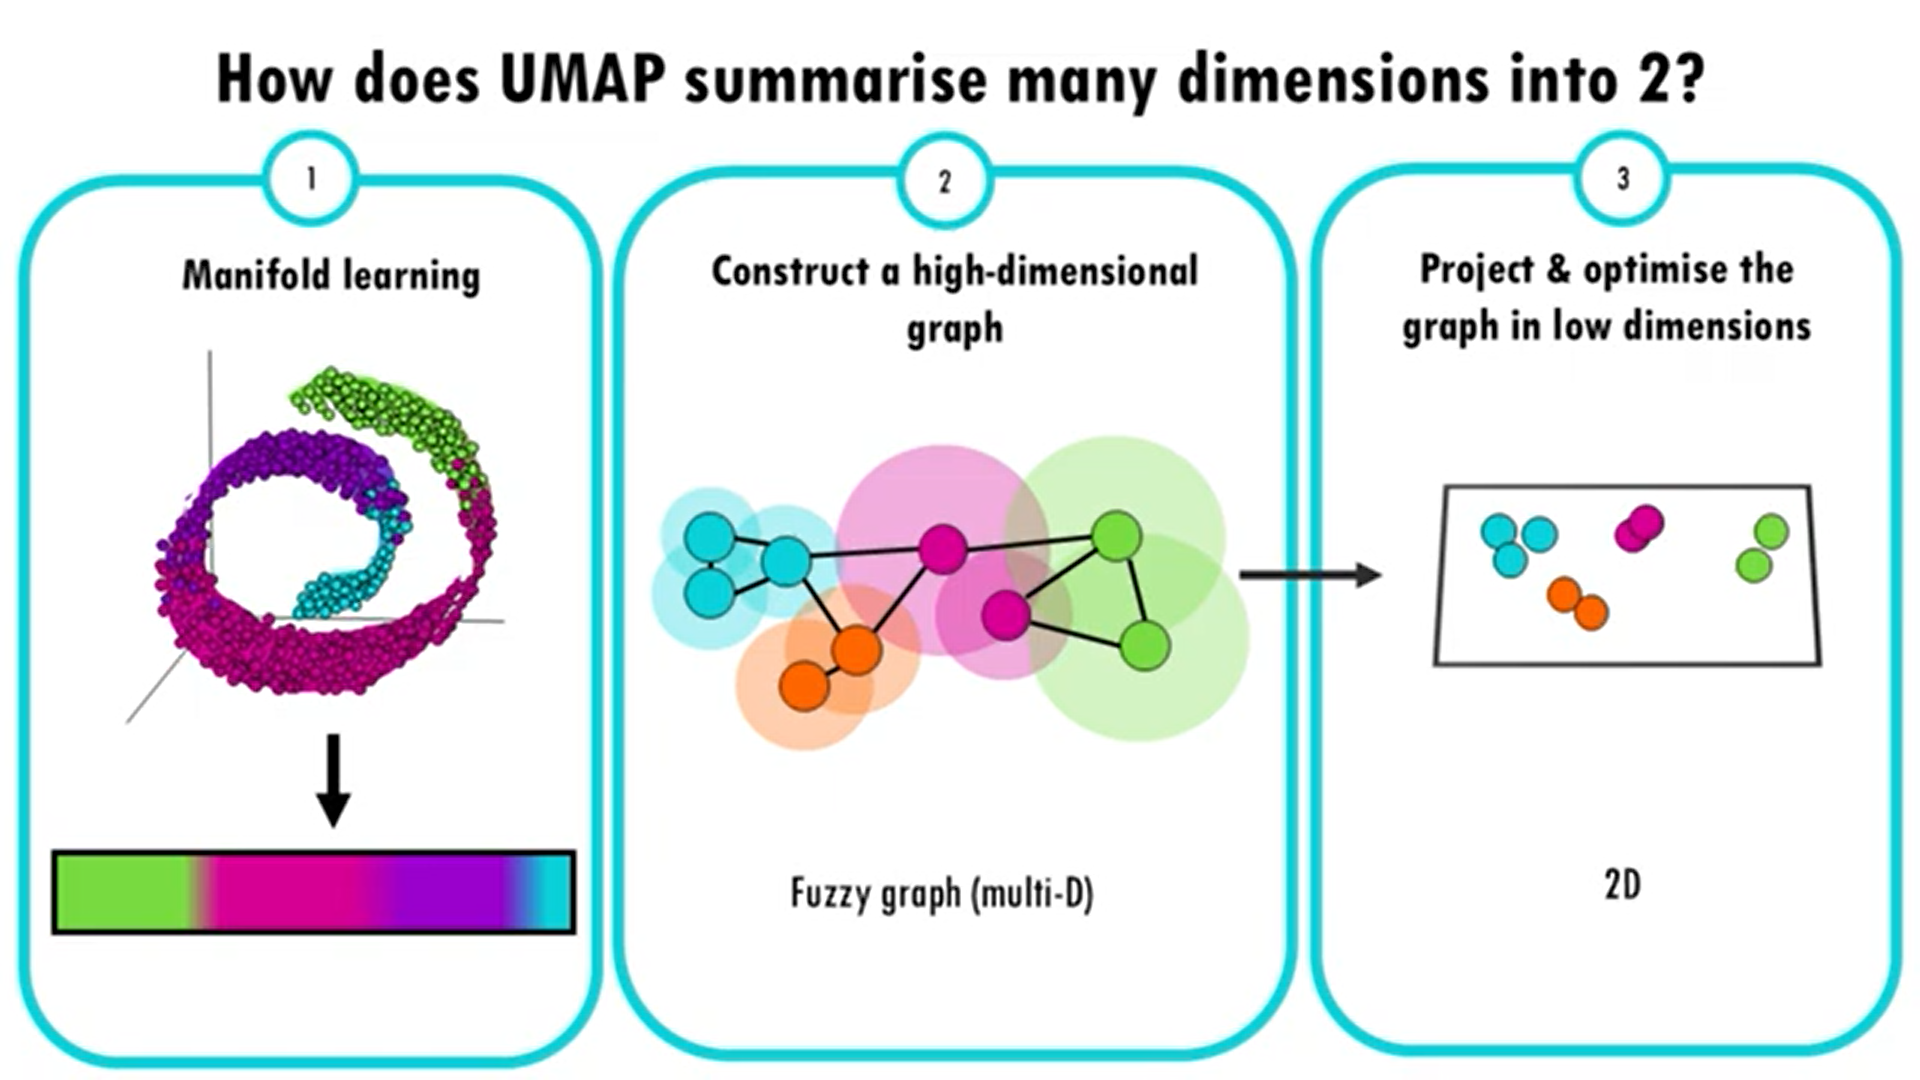

For the intuitive explanation of the internal workings of UMAP, please refer to the class recording of the dimensionality reduction session.

### Dimensionality Reduction Practicum

In [7]:
#import all relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler


In [8]:
#I got the data from the UCL Davis website, use the pythong code below to access it, first run
#pip install ucimlrepo

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
taiwanese_bankruptcy_prediction = fetch_ucirepo(id=572) 
  
# data (as pandas dataframes) 
X = taiwanese_bankruptcy_prediction.data.features 
y = taiwanese_bankruptcy_prediction.data.targets 
  

In [9]:
print(X.shape,y.shape)

(6819, 95) (6819, 1)


We have 95 features and 6819 training samples- a high-dimensional dataset. Before applying PCA, we need to prepare the data, PCA requires numeric data that is scaled.

In [ ]:
#check that all features are numeric, then scale
X.dtypes.value_counts()

float64    93
int64       2
Name: count, dtype: int64

In [17]:
scaler=RobustScaler()
X_scaled=scaler.fit_transform(X)

In [27]:
#now apply the PCA

pca=PCA(n_components=5)
X_pca=pca.fit_transform(X_scaled)
X_pca.shape


(6819, 5)

In [28]:
pca.explained_variance_ratio_

array([0.94815442, 0.04291086, 0.00587606, 0.0015686 , 0.00120921])

There are 2 ways to run PCA, first you can explicitly define how many principal components you want...
```python
pca=PCA(n_components=3) 
```
or you could use the method in this notebook, where you let PCA decide how many components to come up with, provided they cumulatively explain 95% of the variance in the data.

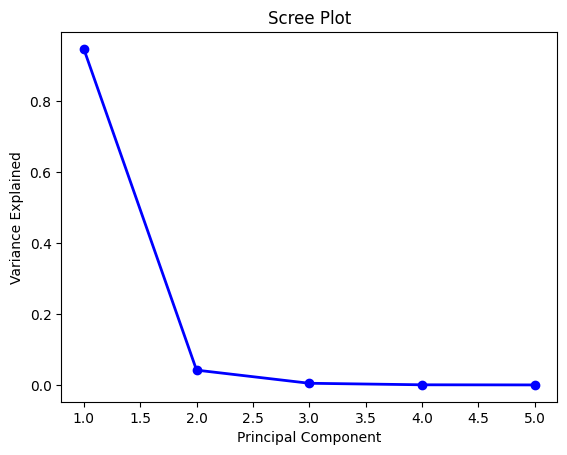

In [29]:
x_pca=pca.fit(X_scaled)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values,x_pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()